In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
df_power = pd.read_excel('power.xlsx')

# head() to display top five rows
df_power.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17


In [4]:
df_power.shape

(21240, 7)

In [5]:
df_power.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Kitchen_consumption               int64
Laundry_consumption               int64
Other_appliances_consumption      int64
dtype: object

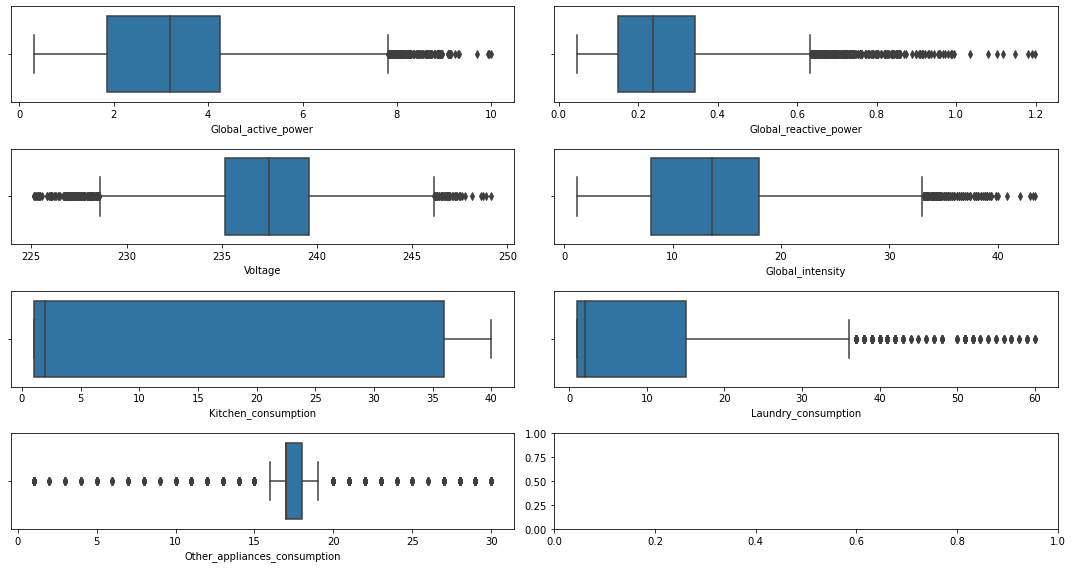

In [13]:
from warnings import filterwarnings
filterwarnings('ignore')
fig, ax= plt.subplots(nrows=4, ncols=2, figsize=(15,8))
for variable, subplots in zip(df_power.columns,ax.flatten()):
    sns.boxplot(df_power[variable], ax=subplots)
plt.tight_layout()
plt.show()

In [17]:
Q1=df_power.quantile(0.25)
Q3=df_power.quantile(0.75)
IQR=Q3-Q1
df_power=df_power[~((df_power<Q1-1.5*IQR) | (df_power>Q3+1.5*IQR)).any(axis=1)]

In [18]:
df_power.shape

(16724, 7)

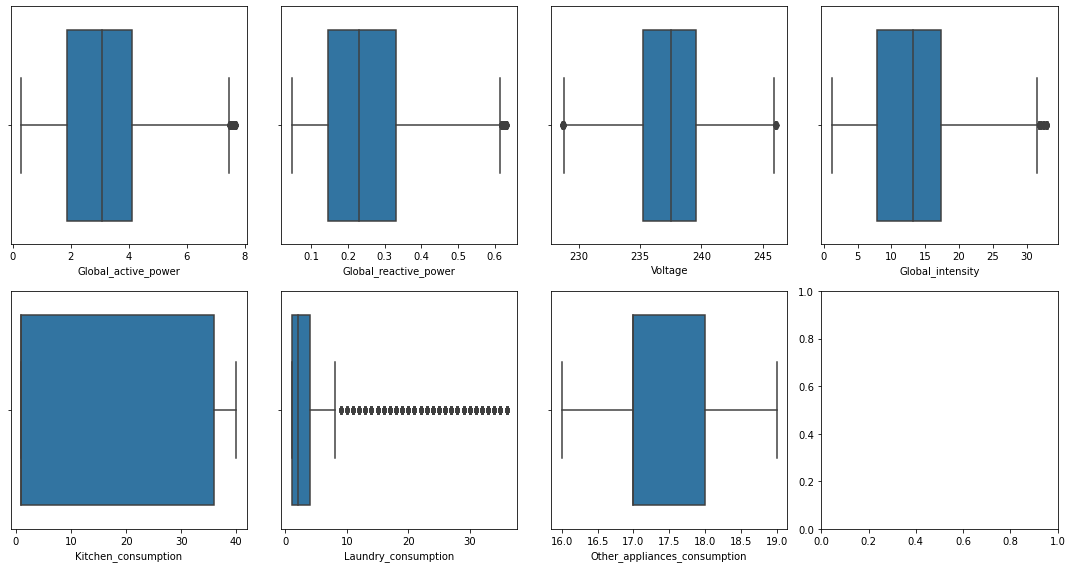

In [25]:
fig, ax= plt.subplots(nrows=2, ncols=4, figsize=[15,8])
for variable, subplots in zip(df_power.columns, ax.flatten()):
    sns.boxplot(df_power[variable],ax=subplots)
plt.tight_layout()
plt.show()

In [26]:
df_power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
count,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000
mean,3.197480,0.249404,237.351591,13.601495,13.151937,6.802141,17.428426
std,1.444141,0.132148,3.289317,6.204866,16.384600,10.920451,0.705236
min,0.302000,0.046000,228.600000,1.200000,1.000000,1.000000,16.000000
25%,1.858000,0.144000,235.220000,7.800000,1.000000,1.000000,17.000000
50%,3.096000,0.230000,237.510000,13.200000,1.000000,2.000000,17.000000
75%,4.100000,0.332000,239.520000,17.400000,36.000000,4.000000,18.000000
max,7.716000,0.632000,246.150000,33.000000,40.000000,36.000000,19.000000


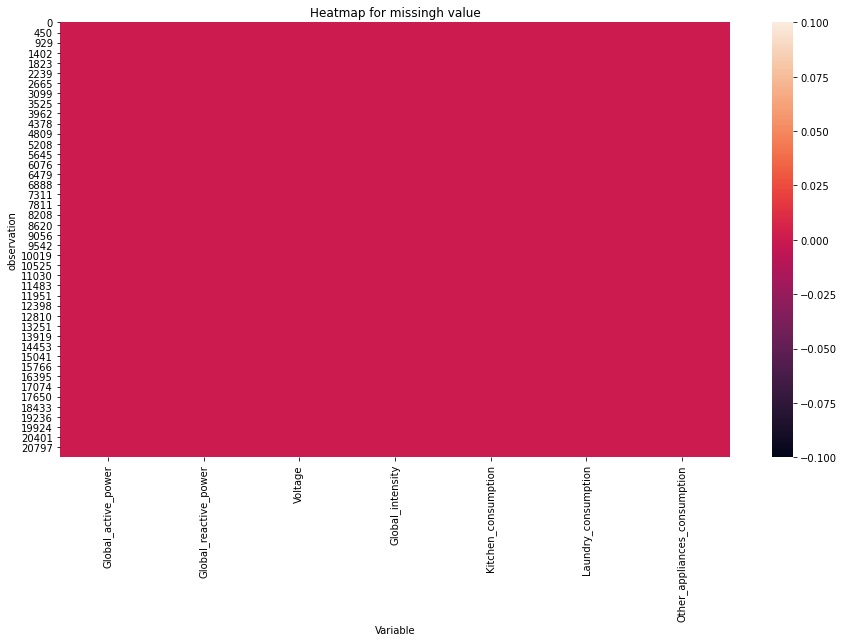

In [31]:
sns.heatmap(df_power.isnull());
plt.title('Heatmap for missingh value')
plt.xlabel('Variable')
plt.ylabel('observation')
plt.show()

In [32]:
feature= df_power.copy()

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
feature=StandardScaler().fit_transform(feature)
scaled_feature=pd.DataFrame(feature,columns=df_power.columns)
scaled_feature.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,-0.661645,-0.661430,-0.006564,-0.580448,-0.741690,0.018119,-0.607511
1,0.357676,0.352612,-0.669335,0.354330,-0.680656,2.582192,-0.607511
2,0.010054,0.413151,-0.413956,0.096460,-0.741690,1.758026,-0.607511
3,0.343827,0.231532,-0.666295,0.322096,-0.741690,2.582192,-0.607511
4,0.004515,0.322342,-0.386593,0.064227,-0.741690,1.849600,-0.607511


# K- Means clustering

In [36]:
from sklearn.cluster import KMeans
wcss=[]
for  i in range(1,8):
    kmeans=KMeans(n_clusters=i, random_state=10)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
wcss[0:5]

[117068.00000000032,
 76347.2135356142,
 61555.7630246084,
 52402.3197620824,
 47249.50791185092]

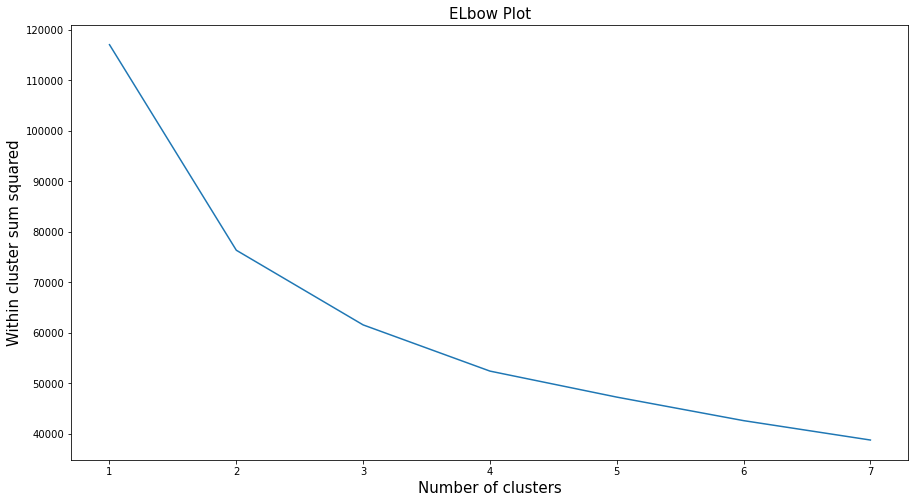

In [38]:
plt.plot(range(1,8), wcss)
plt.title('ELbow Plot', fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Within cluster sum squared', fontsize=15)
plt.show()

In [39]:
! pip install kneed 

In [40]:
from kneed.knee_locator import KneeLocator

In [41]:
k=KneeLocator(x=range(1,8), y=wcss, curve='convex', direction='decreasing')

In [42]:
k.elbow

3

In [49]:
from sklearn.metrics import silhouette_score
n_cluster=[2,3,4,5,6,7]
for i in n_cluster:
    clusters=KMeans(i, random_state=10)
    predict=clusters.fit_predict(scaled_feature)
    score=silhouette_score(scaled_feature, predict, random_state=10)
    print('for n_cluster={}, the silhouette score is {}'.format(i, score))

for n_cluster=2, the silhouette score is 0.32854399395913186
for n_cluster=3, the silhouette score is 0.3416254585956104
for n_cluster=4, the silhouette score is 0.2783093083068228
for n_cluster=5, the silhouette score is 0.2872087661116923
for n_cluster=6, the silhouette score is 0.27428917764463195
for n_cluster=7, the silhouette score is 0.2634628924611293


The optimum value of K is associated with the highest value of the silhouette score.
Therefore the optimum value of K is 3.

# Building the kmeans cluster with n_cluster =3

In [50]:
k_model=KMeans(n_clusters=3, random_state=10)
k_model.fit(scaled_feature)


KMeans(n_clusters=3, random_state=10)

In [51]:
df_power['Clusters']=k_model.labels_

In [53]:
df_power.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Clusters
0,2.242,0.162,237.33,10.0,1,7,17,1
1,3.714,0.296,235.15,15.8,2,35,17,2
2,3.212,0.304,235.99,14.2,1,26,17,2
3,3.694,0.280,235.16,15.6,1,35,17,2
4,3.204,0.292,236.08,14.0,1,27,17,2


In [57]:
df_power.Clusters.value_counts()

1    9040
0    5052
2    2632
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Clusters', ylabel='count'>

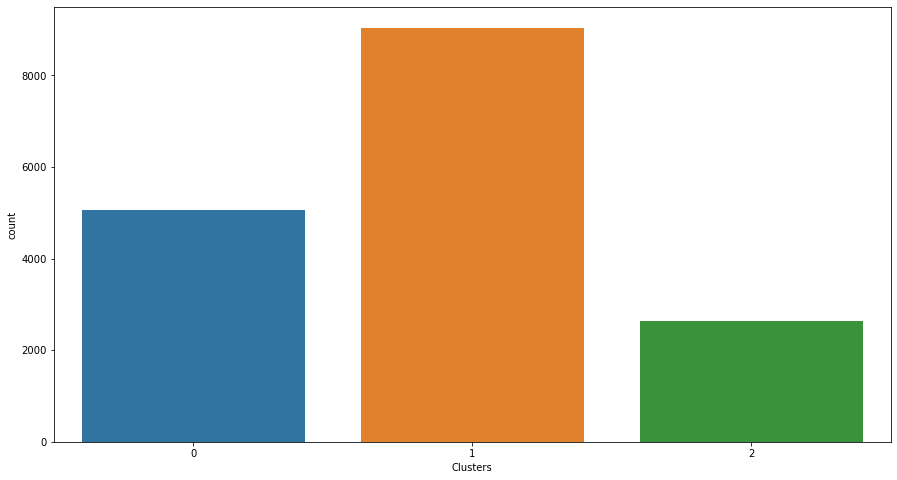

In [58]:
sns.countplot(df_power['Clusters'])

In [68]:
center=pd.DataFrame(k_model.cluster_centers_, columns=df_power.drop('Clusters', axis=1).columns)
center

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,0.731003,0.148562,-0.424762,0.724348,1.249091,-0.430561,-0.293989
1,-0.752356,-0.074582,0.437979,-0.752492,-0.692633,-0.376804,0.323291
2,1.180954,-0.028994,-0.688994,1.194195,-0.018619,2.120634,-0.546093


In [71]:
from scipy.cluster.hierarchy import linkage

In [72]:
link_mat=linkage(scaled_feature, method='ward')
print(link_mat[0:10])

[[5.94600000e+03 5.94700000e+03 1.38494761e-03 2.00000000e+00]
 [1.31280000e+04 1.31290000e+04 1.38494761e-03 2.00000000e+00]
 [1.39050000e+04 1.39080000e+04 1.38494761e-03 2.00000000e+00]
 [1.28110000e+04 1.28130000e+04 2.76989522e-03 2.00000000e+00]
 [1.05700000e+03 1.06000000e+03 3.04023550e-03 2.00000000e+00]
 [7.05800000e+03 7.06200000e+03 3.04023550e-03 2.00000000e+00]
 [5.16400000e+03 5.16700000e+03 3.04023550e-03 2.00000000e+00]
 [6.75200000e+03 6.75300000e+03 3.04023550e-03 2.00000000e+00]
 [1.21300000e+04 1.21320000e+04 3.04023550e-03 2.00000000e+00]
 [8.75400000e+03 8.75700000e+03 3.04023550e-03 2.00000000e+00]]


In [73]:
from scipy.cluster.hierarchy import dendrogram